# Introduction to Machine Learning with Python


Library pandas digunakan untuk load dataset dalam bentuk csv, melakukan analisa terhadap data, serta mempersiapkan dataset untuk keperluan training.

In [ ]:
# Libary yang akan kita pakai!

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv

if os.path.isfile(directory):
  print("File ditemukan")

File ditemukan


In [ ]:
dataset = pd.read_csv(directory)

In [ ]:
dataset.head() # Mengeluarkan beberapa data awal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
dataset.info() # Memunculkan informasi awal mengenai dataset (data langsung dikenal sebagai float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
dataset.describe() # Mengeluarkan analisa awal mengenai dataset

# Atau print(dataset.describe()) apabila langsung dijalankan di command line selain jupyter notebook

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
print(dataset.dtypes.tolist()) # Ada data apa saja yang di dataset?

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [ ]:
dataset_numbers = dataset.select_dtypes(include = ['float64'])
dataset_numbers.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


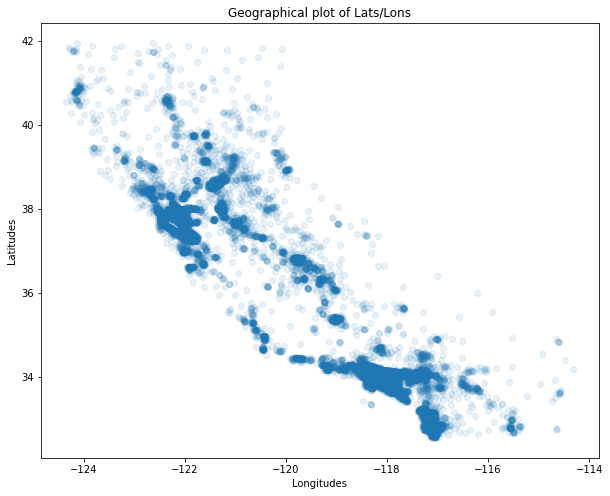

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter('longitude','latitude',data=dataset,alpha=0.1)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

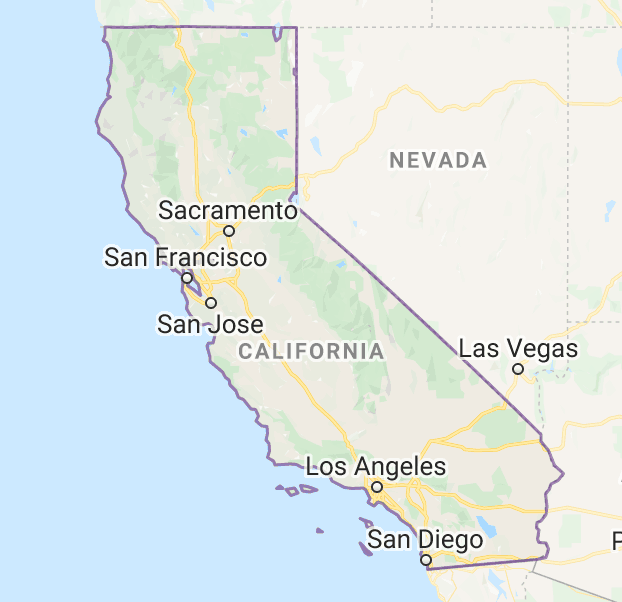

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79e72d4160>,
      dtype=object)

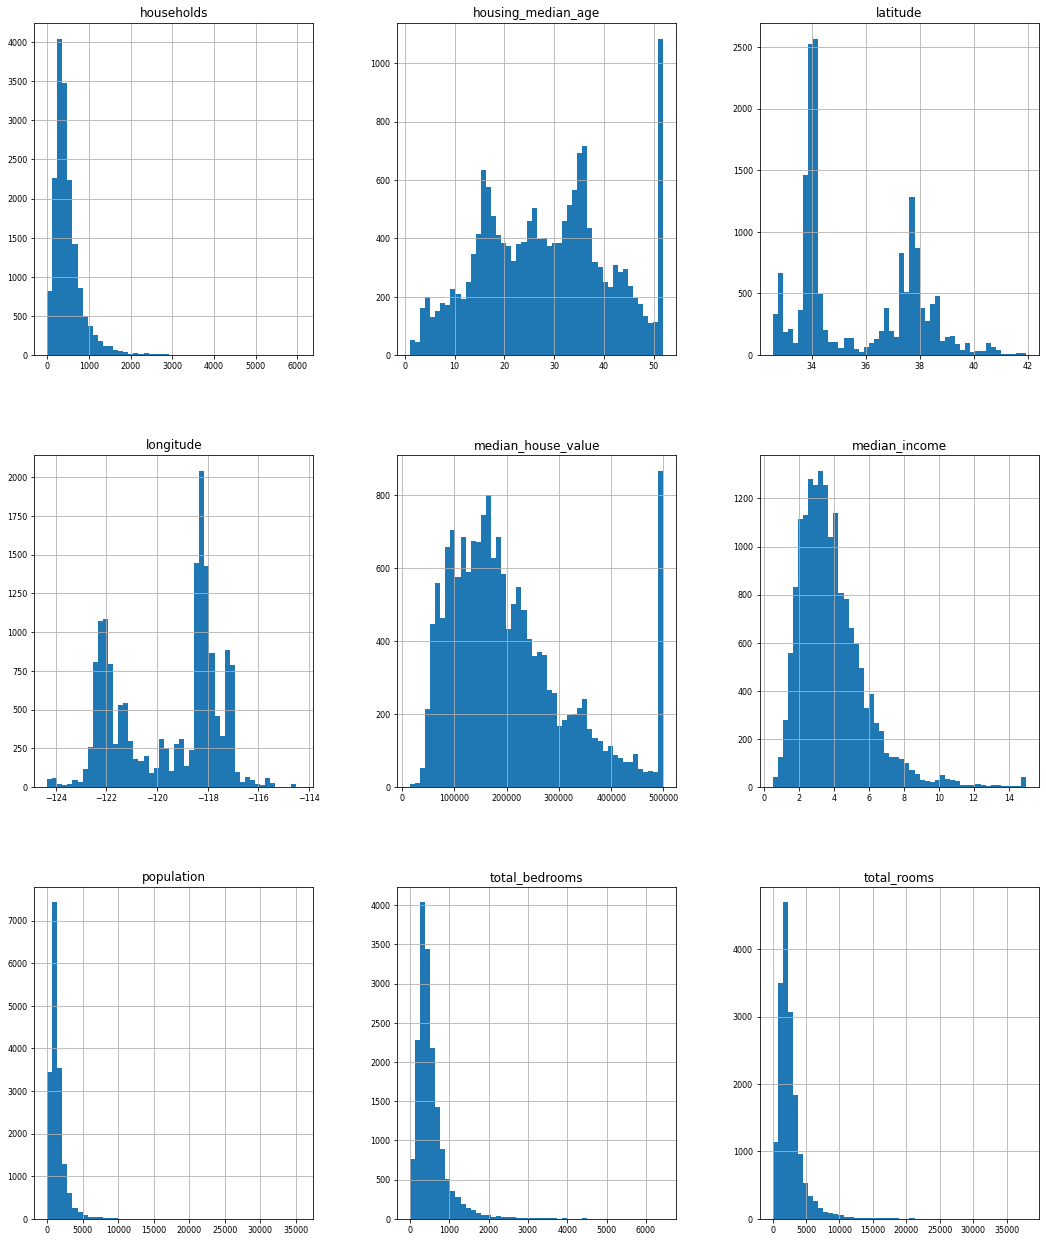

In [ ]:
dataset_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

**Menghitung korelasi antar setiap feature/attribute**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79d8e48240>,
      dtype=object)

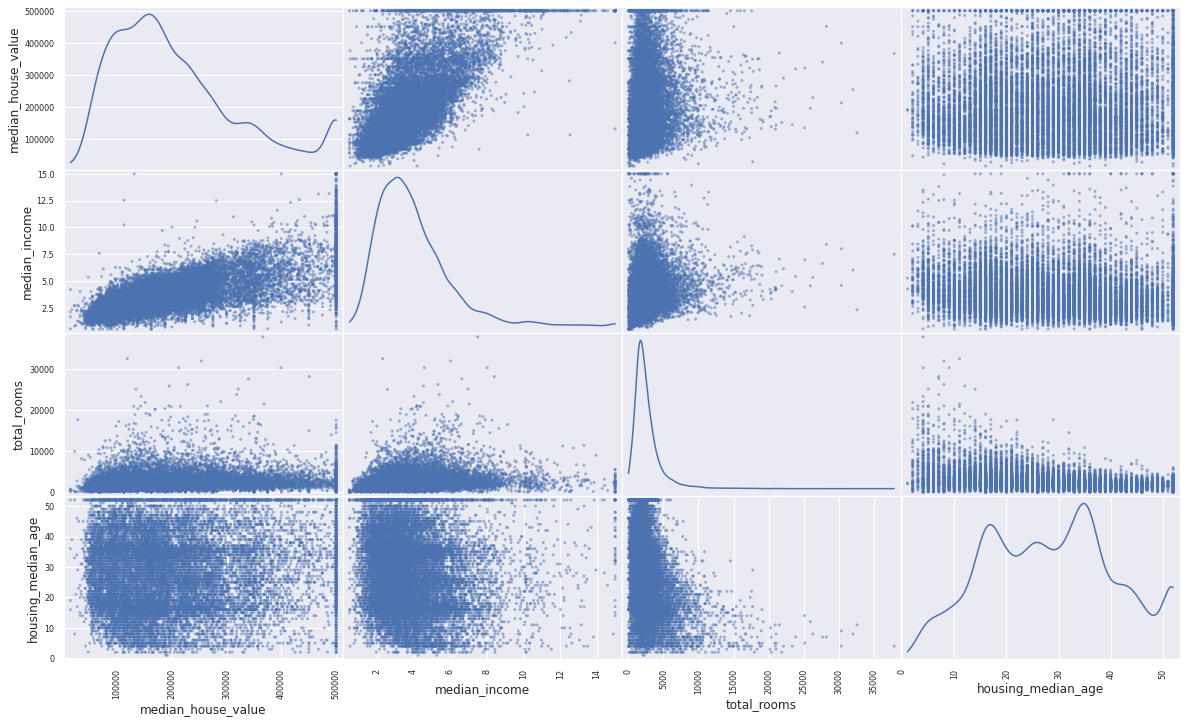

In [ ]:
sns.set()
feat = ['median_house_value','median_income','total_rooms','housing_median_age']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


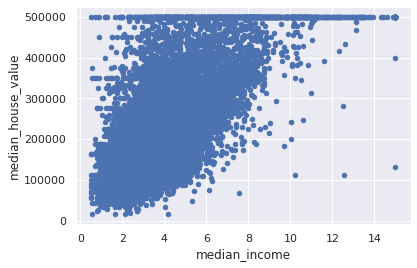

In [ ]:
dataset.plot(kind="scatter", x="median_income", y="median_house_value")
plt.show()

In [ ]:
dataset_numbers_corr = dataset_numbers.corr()['median_house_value'][:-1] # -1 karena kolom terakhir adalah median_house_value
golden_features_list = dataset_numbers_corr[abs(dataset_numbers_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with median_house_value:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with median_house_value:
median_income    0.691871
Name: median_house_value, dtype: float64


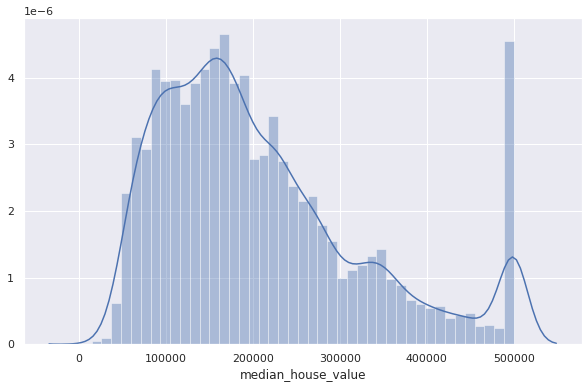

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(dataset_numbers['median_house_value'])
plt.show()

Beberapa hal yang perlu diingat:
* Ini merupakan grafik histogram, yang menunjukan karakteristik sebaran data secara visual.
* Contoh di grafik ini, karena mean dari median_house_value bernilai 207,300.91, puncak dari grafik juga berada di angka tersebut (bagian kurva paling tinggi).
* Grafik ini dapat menunjukan apakah terdapat outlier/data anomali yang harus kita hapus. Data anomali berjumlah relatif sedikit dan dapat menghambat kita dalam menemukan pattern dalam dataset. Outlier bisa ada karena kesalahan dalam pencatatan data, ataupun memang muncul sebagai anomali yang jarang terjadi.

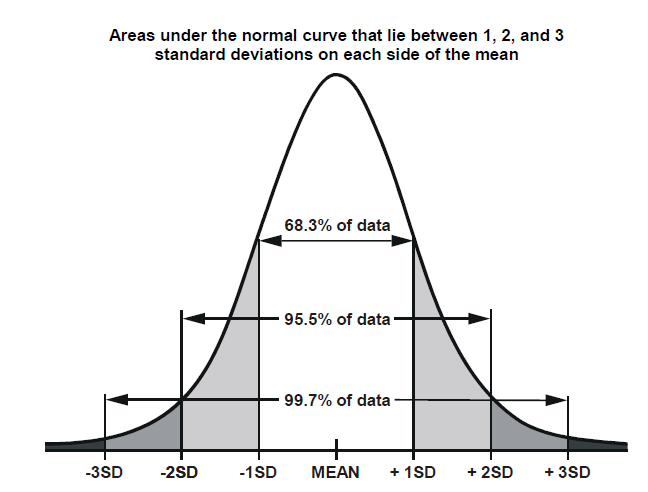

In [ ]:
correlation_matrix = dataset.corr()
corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_dataframe = pd.DataFrame({'Column': corr.index,
                 'Correlation with median_house_value': corr.values})

correlation_dataframe

,Column,Correlation with median_house_value
0,median_house_value,1.000000
1,median_income,0.691871
2,total_rooms,0.130991
3,housing_median_age,0.106758
4,households,0.061031
5,total_bedrooms,0.045783
6,population,-0.027850
7,longitude,-0.044982
8,latitude,-0.144917


In [ ]:
dataset_corr = dataset.corr()['median_house_value'][:-1] # -1 karena kolom terakhir adalah median_house_value
golden_features_list = dataset_corr[abs(dataset_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with median_house_value:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with median_house_value:
median_income    0.691871
Name: median_house_value, dtype: float64


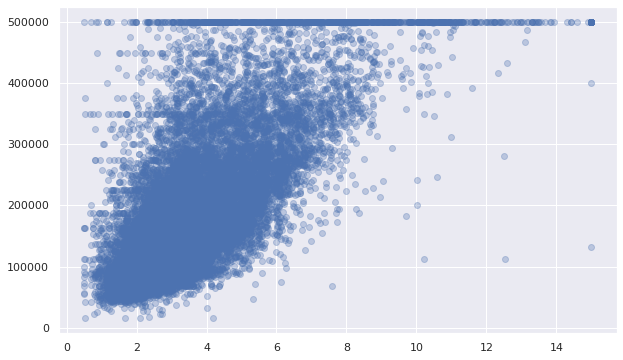

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=dataset['median_house_value'], x=dataset['median_income'], alpha=0.3)

In [ ]:
# Cek, apakah ada yang kosong?
for i in dataset.columns:
  print(i,': ',len(dataset[dataset[i].isnull()][i]))

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  0
population :  0
households :  0
median_income :  0
median_house_value :  0


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 

dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
feature = dataset.drop(['median_house_value'], axis=1) # Hapus kolom median_house_value dari feature karena ini adalah variabel yang kita ingin diprediksi
label = dataset['median_house_value'] # Kolom median_house_value digunakan karena ini adalah yang ingin kita prediksi

feature_scaled = scaler.fit_transform(feature.values) # Features setelah discaling
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1,1)).flatten() # Label/hasil prediksi setelah scaling

# Pisahkan training & test set
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2) # 80% training, 20% testing

# Menghasilkan feature untuk training & testing, serta label untuk training & testing

**Machine Learning Algorithms**

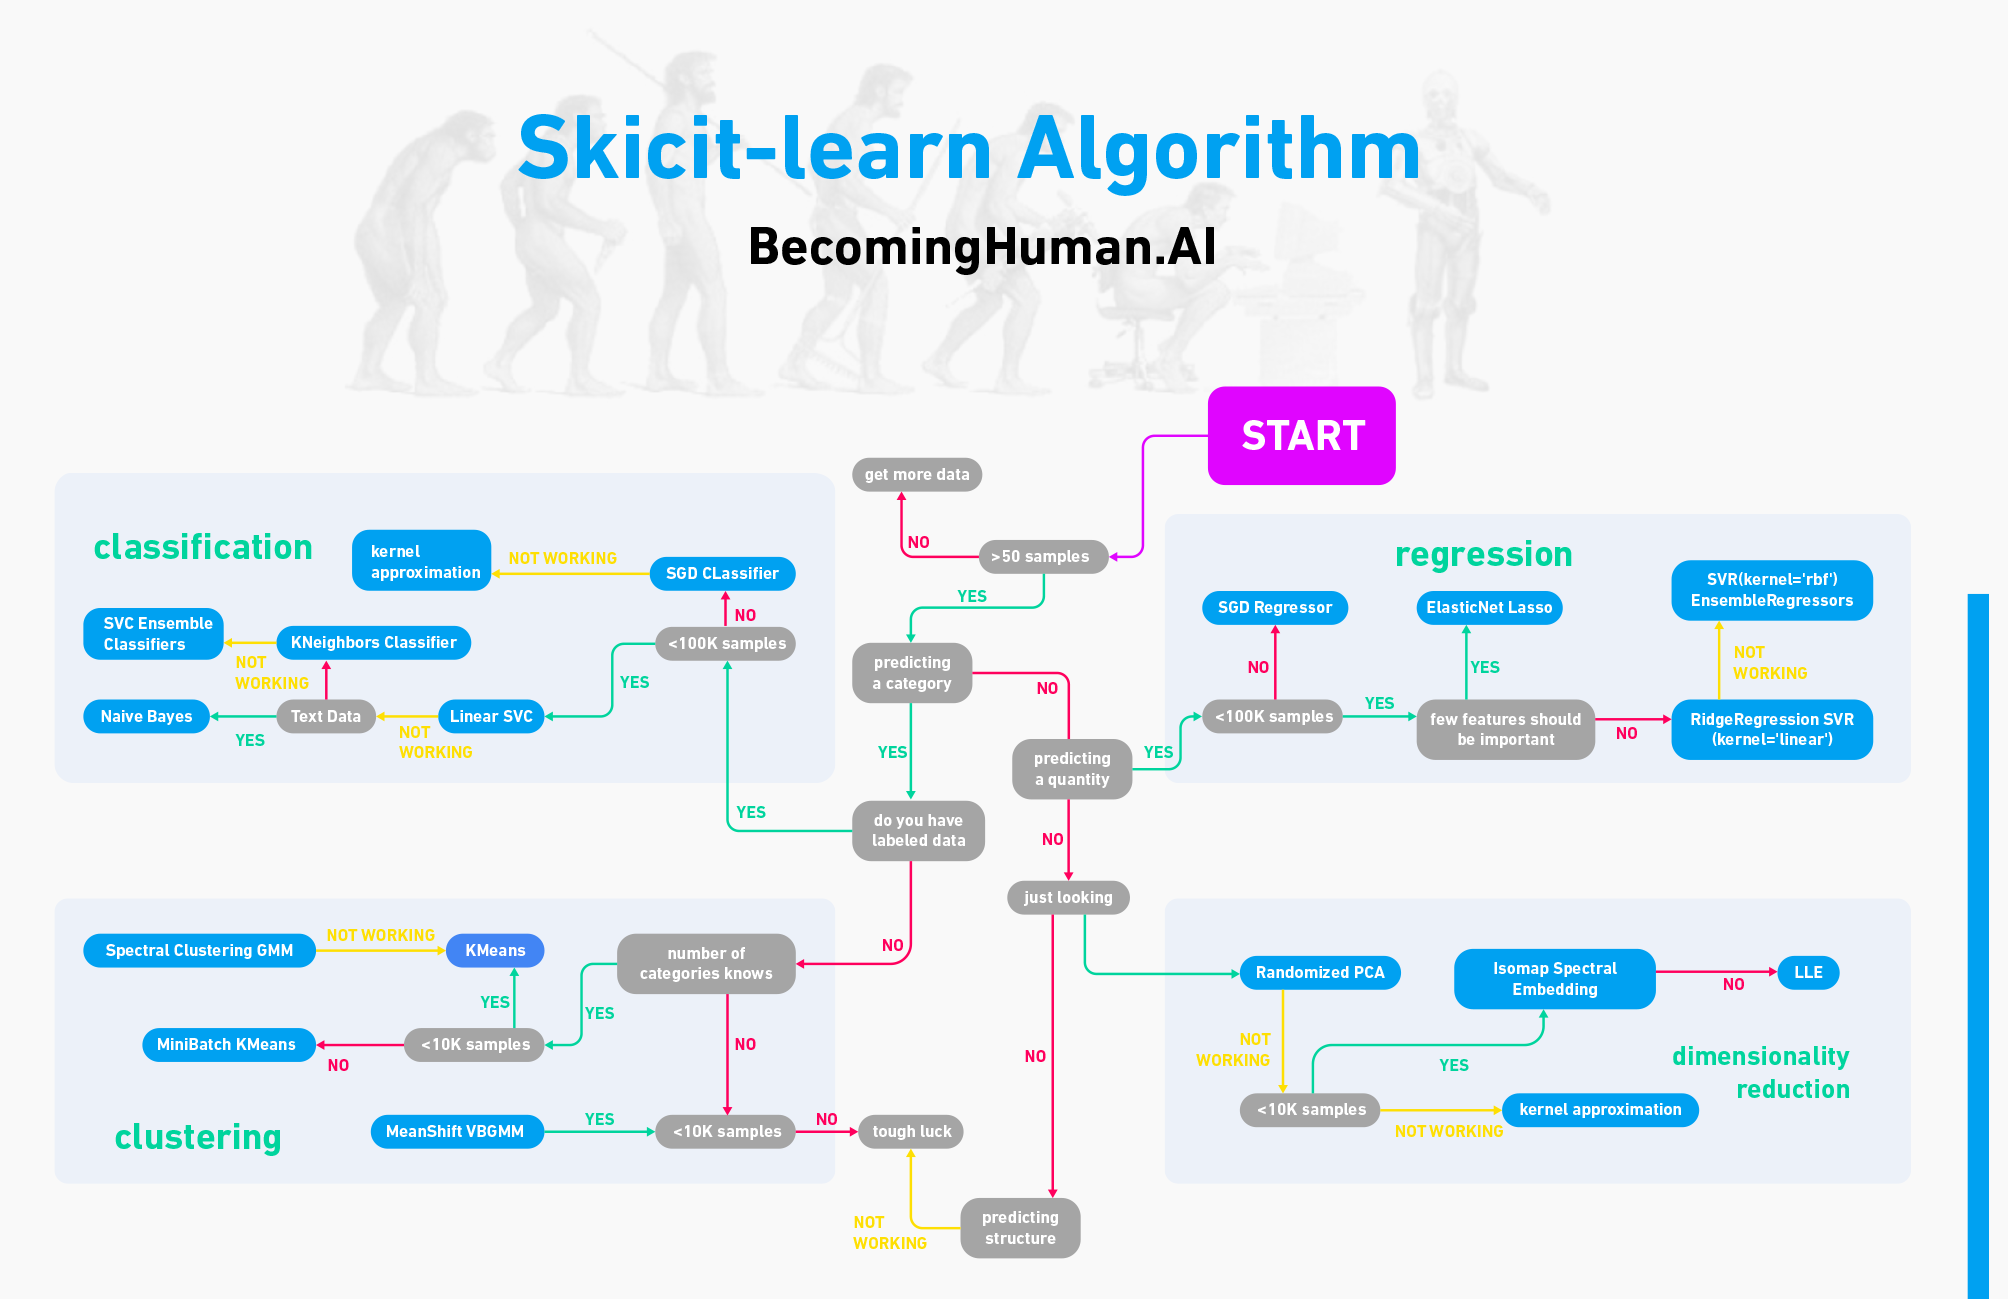

**Linear Regression**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train), label_train)

0.4464396385298992

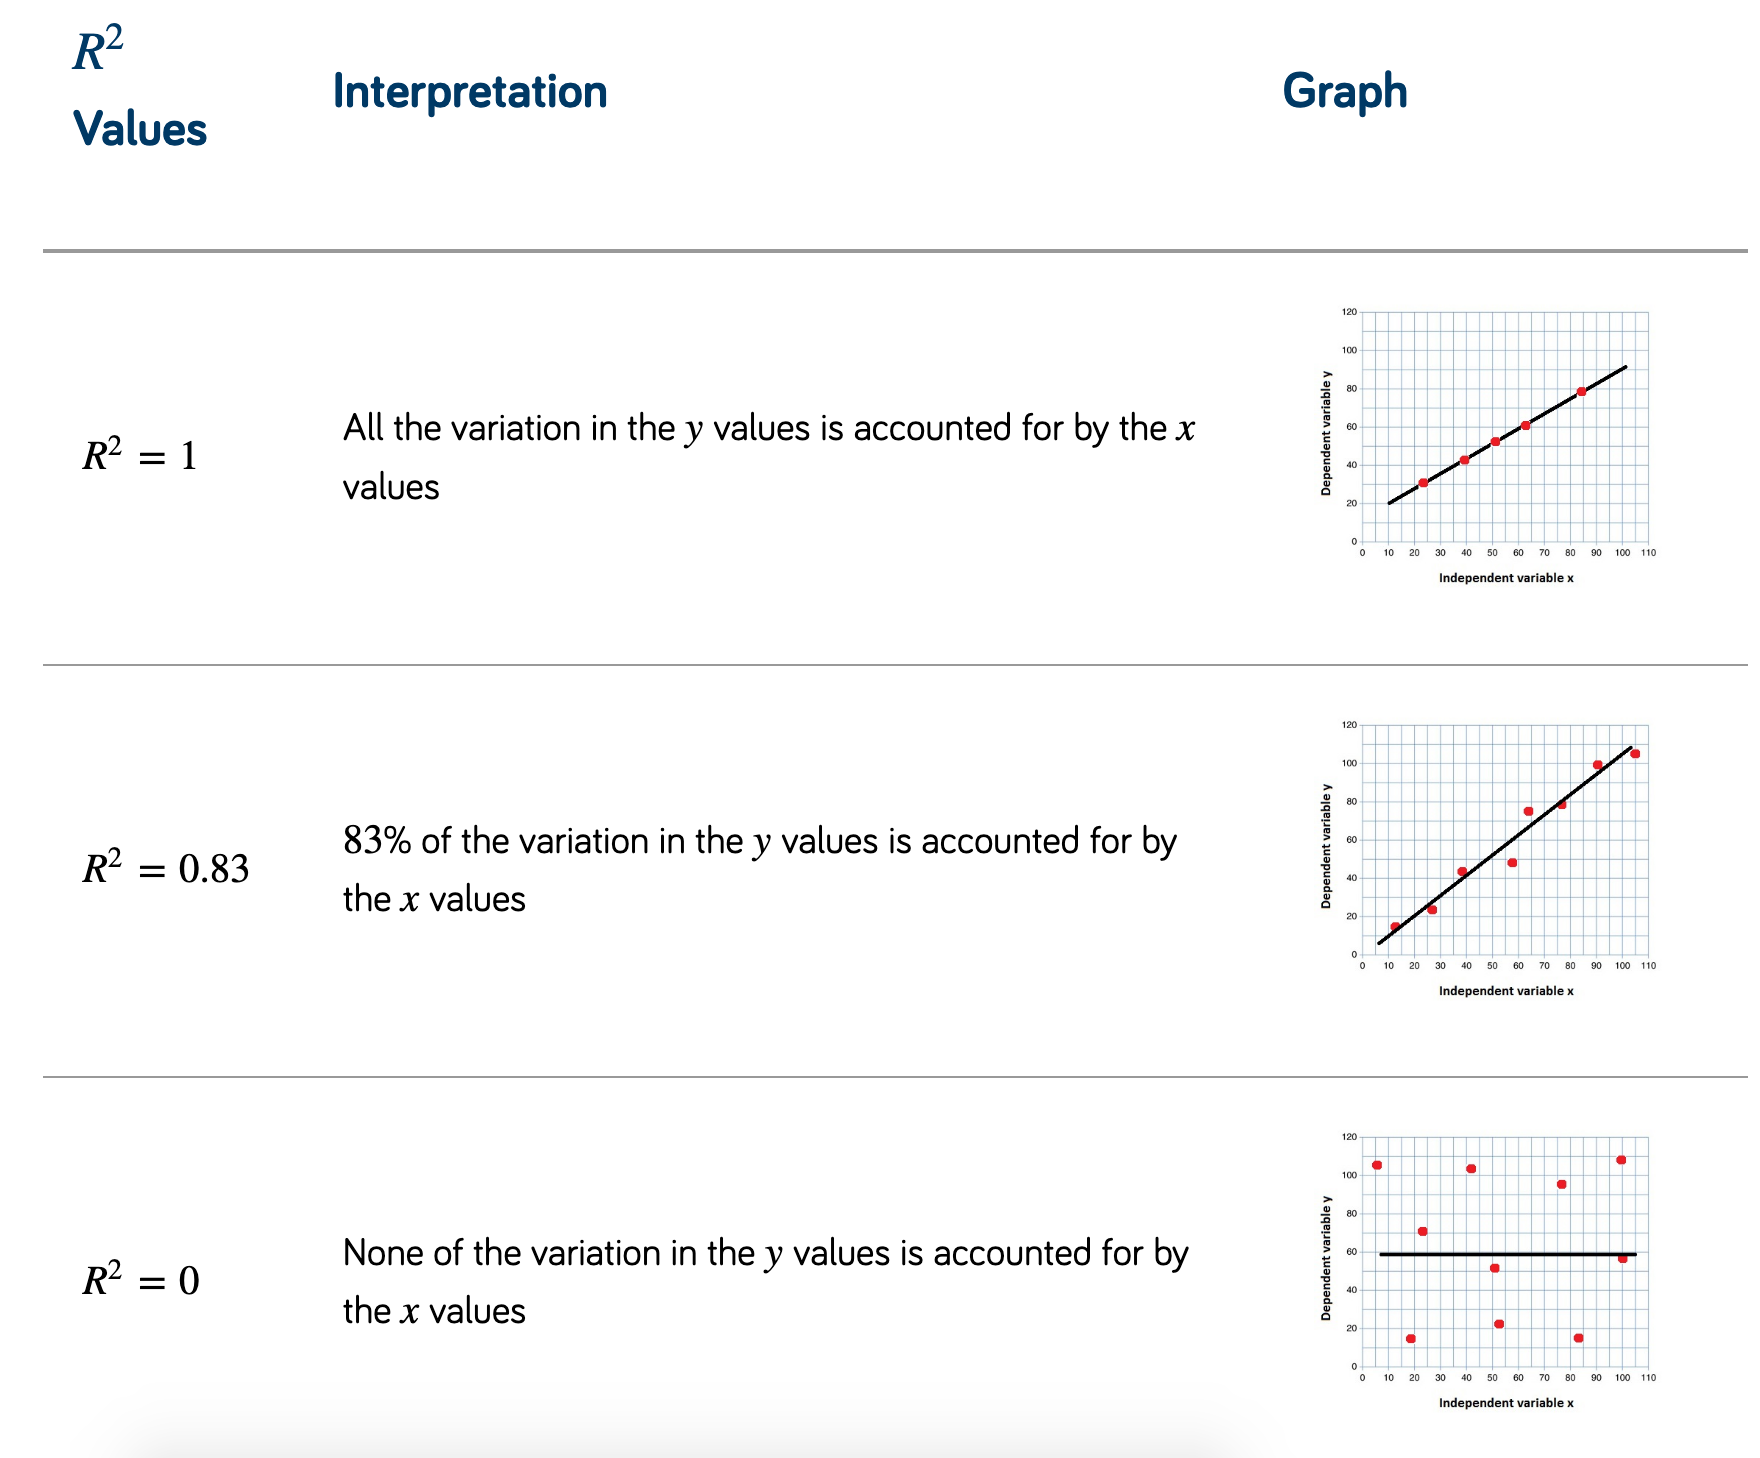

In [ ]:
from sklearn.model_selection import cross_val_score

cross_validation_score = cross_val_score(linear_reg, feature_train,label_train, cv=10)
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

print(cross_validation_score)
print(reg_score)

[-1.00535056  1.4062648  -1.31316131 ... -0.63890918  0.31383839
  2.52370406]
[-1.23125089  0.13535989  2.52370406 ... -0.57941635  2.31935048
  0.74667032]
[0.66980387 0.62636121 0.62594031 0.6145832  0.64433112 0.65701687
 0.62571439 0.6666694  0.63201131 0.64929958]
0.39489016710762737


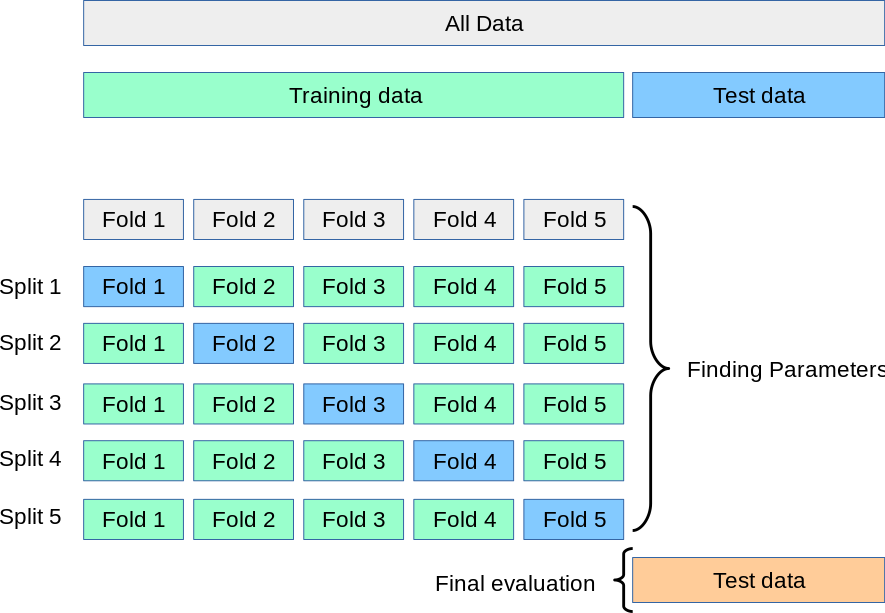

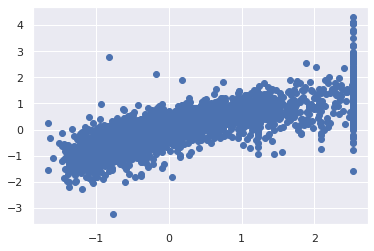

In [ ]:
predictions = linear_reg.predict(feature_test)
plt.scatter(label_test, predictions)

Yang dicari adalah scatterplot diagonal, yang artinya hasil prediksi sesuai dengan ekspektasi

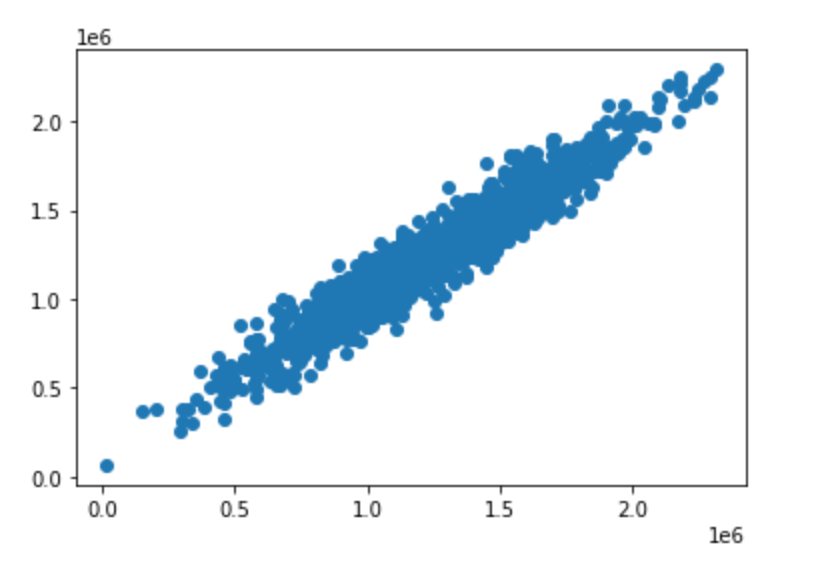

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)

r2_score(tree_reg.predict(feature_train),label_train)

0.9999999999999538

Ini merupakan contoh **overfitting**

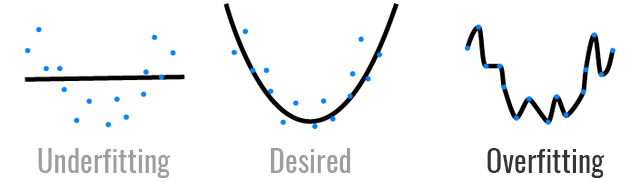

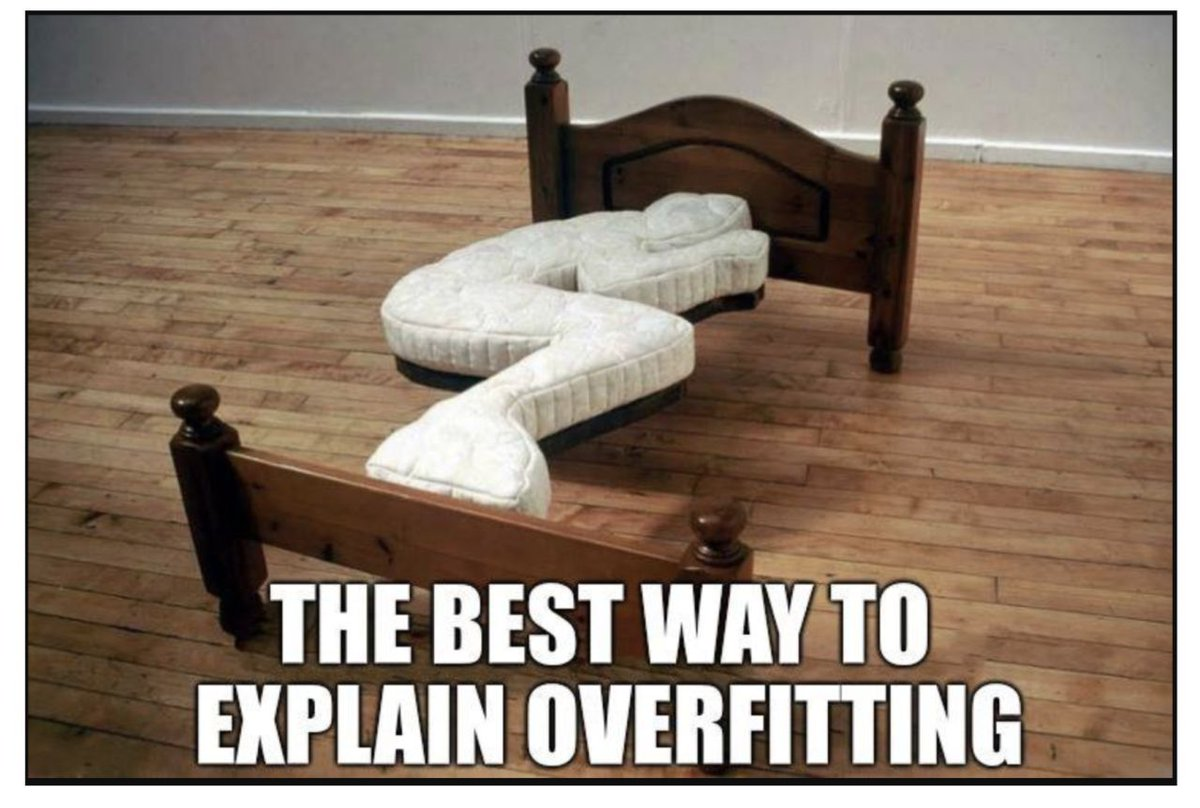

In [ ]:
cross_val_score(tree_reg, feature_train, label_train, cv=10)

array([0.65111327, 0.62786055, 0.57969736, 0.65609155, 0.62640057,
       0.64374719, 0.6450494 , 0.61074848, 0.59658258, 0.6592856 ])

In [ ]:
tree_score = r2_score(tree_reg.predict(feature_test),label_test) 
tree_score

0.6078411966349624

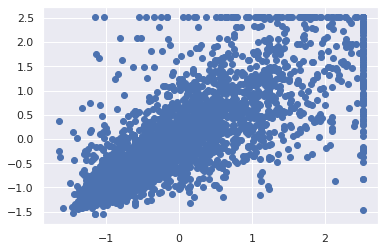

In [ ]:
predictions = tree_reg.predict(feature_test)
plt.scatter(label_test, predictions)

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train,label_train)
r2_score(forest_reg.predict(feature_train), label_train)
cross_validation_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.8314291  0.81405719 0.79865402 0.79407264 0.80877048 0.81298875
 0.82525859 0.81931116 0.81943013 0.82051149]


In [ ]:
forest_score = r2_score(forest_reg.predict(feature_test), label_test) 
forest_score

0.7508304006836185

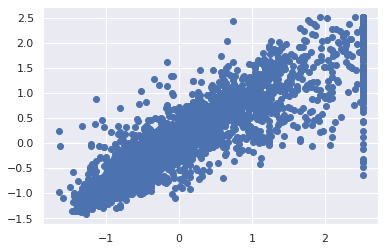

In [ ]:
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)

# Assignments

1. Visualisasikan korelasi feature median_house_value dengan `total_rooms`, `housing_median_age`, dan `households` menggunakan scatter plot.

2. Lakukan training dengan komposisi berikut:
  * 90% training data & 10% testing
  * 85% training data & 15% testing

  Lalu lakukan regression menggunakan RandomForestRegressor. Bandingkan ketika skor r2 yang didapat (90% training, 85% training, 80% training yang sudah dilakukan sebagai contoh diatas).

  Tariklah kesimpulan yang didapat setelah membandingkan 3 skor tersebut.

3. Gunakan `SVR` (SVM Regression) (`from sklearn.svm import SVR`) untuk melakukan training. Bandingkan hasil r2 score yang didapat dengan `LinearRegression`. Komposisi training & testing: 80:20. Tariklah kesimpulan yang didapat.
  * Hint: Cek https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
